## Problem Statement

Motivation : Being a civil engineer i have always wondered how the prices of the houses are calculated and felt there are various factors which affect the price. So i am quite curious to work on this project as i have always wondered about the same.The relationship between house prices and the economy is an important motivating factor for predicting house prices. There is no accurate measure of house prices. A property’s value is important in real estate transactions.  House prices trends are not only the concerns for buyers and sellers, but they also indicate the current economic situations. Therefore, it is important to predict the house prices without bias to help both buyers and sellers make their decisions. Houses tend to have various competing features which makes it difficult to decide on the right price. <br>
<br>
Objective : The objective is to create a linear regression model for House Sales in King County, USA and predict the sale price for houses.

Dataset: <br>
In this dataset we have to predict the sales price of houses in King County, Seattle. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data. <br>
<br>
Source: https://data.kingcounty.gov/ <br>
Structure : 20 house features plus the price, along with 21613 observations.<br>
Description:<br>
id :- It is the unique numeric number assigned to each house being sold.<br>
date :- It is the date on which the house was sold out.<br>
price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.<br>
bedrooms :- It determines number of bedrooms in a house.<br>
bathrooms :- It determines number of bathrooms in a bedroom of a house.<br>
sqft_living :- It is the measurement variable which determines the measurement of house in square foot.<br>
sqft_lot : It is also the measurement variable which determines square foot of the lot.<br>
floors: It determines total floors means levels of house.<br>
waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.<br>
view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.<br>
condition : It determines the overall condition of a house on a scale of 1 to 5.<br>
grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11<br>
sqft_above : It determines square footage of house apart from basement.<br>
sqft_basement : It determines square footage of the basement of the house.<br>
yr_built : It detrmines the date of building of the house.<br>
yr_renovated : It detrmines year of renovation of house.<br>
zipcode : It determines the zipcode of the location of the house.<br>
lat : It determines the latitude of the location of the house.<br>
long : It determines the longitude of the location of the house.<br>
sqft_living15 : Living room area in 2015(implies-- some renovations)<br>
sqft_lot15 : lotSize area in 2015(implies-- some renovations)<br>

Methodology: The dataset has been split into train, validation and test, with the Test data having 2217 observations, as against train and validation data having 9761 and 9635 observations respectively. We train the model on the Train data. Evaluate several models on the Validation data. The final model is then used for predicting the target variable (Price) for the Test data.<br>

In [1]:
#Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas.util.testing as tm
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

C:\Users\yashc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\yashc\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#Reading training, test and validation data
train = pd.read_csv("C:\\Users\\yashc\\Desktop\\workspace\\HousePricePrediction\\Data\\wk3_kc_house_train_data.csv")
test = pd.read_csv("C:\\Users\\yashc\\Desktop\\workspace\\HousePricePrediction\\Data\\wk3_kc_house_test_data.csv")
validate = pd.read_csv("C:\\Users\\yashc\\Desktop\\workspace\\HousePricePrediction\\Data\\wk3_kc_house_valid_data.csv")

In [4]:
#Making a copy of the data
train_orginal = train.copy()
test_orginal = test.copy()
validate_orginal = validate.copy()

In [5]:
#checking dimensions of the data
print(f"There are {train.shape[0]} number of rows and {train.shape[1]} columns in train data.")
print("--------------------------------------------------------------")
print(f"There are {test.shape[0]} number of rows and {train.shape[1]} columns in test data.")
print("--------------------------------------------------------------")
print(f"There are {validate.shape[0]} number of rows and {train.shape[1]} columns in validate data")

There are 9761 number of rows and 21 columns in train data.
--------------------------------------------------------------
There are 2217 number of rows and 21 columns in test data.
--------------------------------------------------------------
There are 9635 number of rows and 21 columns in validate data


In [6]:
#checking for missing values.
train.isnull().sum()           #no missing value in train dataset.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
test.isnull().sum()       #no missing value for test dataset.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
validate.isnull().sum()      #no missing values for validate dataset.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
validate.head(341)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
4,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,293720140,20140605T000000,449950.0,3,2.50,2170,4912,2.0,0,0,3,7,2170,0,2003,0,98028,47.7767,-122.239,2010,4395
337,579003610,20150224T000000,517500.0,3,1.50,1430,5200,1.0,0,3,4,7,1250,180,1940,0,98117,47.6988,-122.387,2210,6240
338,3432500200,20150409T000000,329999.0,3,1.00,1150,6908,1.0,0,0,3,6,800,350,1952,0,98155,47.7447,-122.313,1150,6908
339,9323600060,20140715T000000,942500.0,5,3.50,3750,9612,1.0,0,2,4,9,2030,1720,1981,0,98006,47.5511,-122.157,3270,9688


In [11]:
#checking the data type
train.dtypes    

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
#Here we can see that date is object type and it should be a datetime varibale.
#we will convert date into datetime and extract year sold.
train['date'] = pd.to_datetime(train['date'])
train['yr_Sold'] = train['date'].dt.year

In [13]:
#we will do the same for validate data
validate['date'] = pd.to_datetime(validate['date'])
validate['yr_Sold'] = validate['date'].dt.year

In [14]:
# we will do the same for test data
test['date'] = pd.to_datetime(test['date'])
test['yr_Sold'] = test['date'].dt.year

In [15]:
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165,2014.316259
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402,0.465039
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000,2014.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000,2014.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000,2014.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000,2015.000000


## Exploratory Data Analysis

### Target Variable

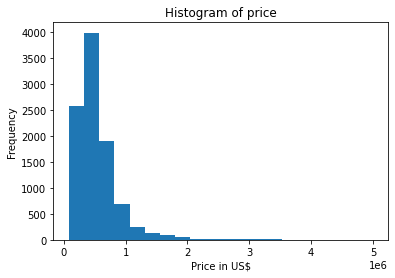

The skewness of price variable is 4.2980618120838665


In [16]:
#Plotting a histogram for target variable - price
plt.hist(train['price'], bins = 20, range = (80000,5000000), histtype = "bar")
plt.title("Histogram of price")
plt.xlabel("Price in US$")
plt.ylabel("Frequency")

plt.show()
print(f"The skewness of price variable is {train['price'].skew()}")

We can clearly see from this histogram that the majority of the houses are below 1 million US$. We can also see the target variable is skewed to the right. So we will do a log transformation to make it normal.

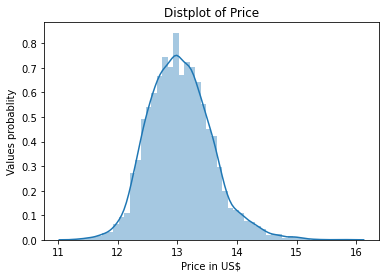

The skew of log price is 0.45826266821334627


In [17]:
#Log transformation of the target variable
log_price = np.log(train.price)
sns.distplot(log_price)
plt.title("Distplot of Price")
plt.xlabel("Price in US$")
plt.ylabel("Values probablity")
plt.show()
print(f"The skew of log price is {log_price.skew()}")

As we can clearly see that log transformation helped us fix the skew and now the distribution of target variable is much closer to normal distribution.

### Numerical Variables

In [18]:
#list if numerical variables
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
print("Number of numerical variables : ", len(numerical_features))

train[numerical_features].head()

Number of numerical variables :  22


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


From the dataset we have 2 year variables. We will extract values like year in which house was built or renovated from these variables. Also we have a date column which specify the sold date of the house from there we can extract year of house sold and compare.

In [19]:
#list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'yr' in feature]
year_feature

['yr_built', 'yr_renovated', 'yr_Sold']

In [20]:
#let us explore the contents of these variables
for feature in year_feature:
    print(feature, train[feature].unique())

yr_built [1965 2001 1942 1927 1977 1979 1916 1947 1995 1985 1941 1915 1948 1981
 1996 2014 1959 2003 1966 1953 1955 1950 1954 1989 1968 1973 2005 1956
 2002 1952 1925 1961 1988 1939 1975 1980 1992 1910 1991 2010 1987 1914
 1978 2004 1986 1923 1960 1990 1962 1976 1949 2008 1920 2007 1997 1994
 1993 1999 1983 1904 1940 1928 2006 1937 1982 1969 1929 1957 1964 1913
 1984 1908 1943 1922 1911 1930 1907 2013 1958 1998 1967 1909 1974 1972
 1912 1917 1900 2000 1924 1951 1932 1971 1946 1963 2012 1970 1944 1918
 1905 2009 1936 1926 1906 1902 1938 1919 1903 1921 1931 1901 1933 1945
 2011 1935 2015 1934]
yr_renovated [   0 1992 1994 1978 2005 2008 1984 2014 1974 1983 2013 2003 1945 1990
 1988 1957 1977 1995 2000 1999 1986 2007 1987 1973 2006 2001 1980 1997
 2002 1950 1991 2015 1989 1963 1962 1996 1981 1972 1970 1985 2004 1982
 1993 2010 2011 1971 2009 1998 1969 1940 1976 2012 1946 1964 1975 1953
 1958 1959 1967 1968 1956 1955 1960 1979 1965]
yr_Sold [2014 2015]


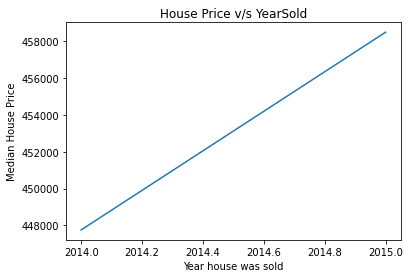

In [21]:
#Now, we will check whether there is a realtion between YearSold and price.
train.groupby('yr_Sold')['price'].median().plot()
plt.xlabel("Year house was sold")
plt.ylabel("Median House Price")
plt.title("House Price v/s YearSold")
plt.show()

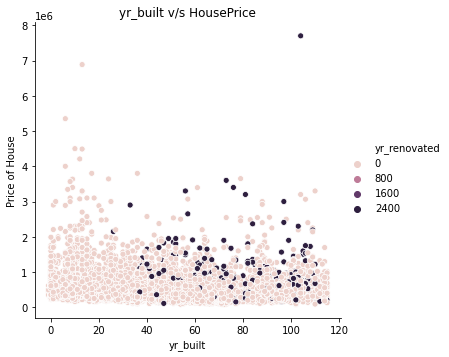

In [22]:
#Here we will compare difference between all year feature with sale price

for feature in year_feature:
    if feature != 'yr_Sold' and feature != 'yr_renovated':
        df = train.copy()
        df[feature] = df['yr_Sold'] - df[feature]
        
        sns.relplot(x = feature, y = 'price',hue = 'yr_renovated', data = df)
        plt.xlabel(feature)
        plt.ylabel("Price of House")
        plt.title(f"{feature} v/s HousePrice")
        plt.show()

In the above plot we can clearly see as the difference in year sold and year built increases the cost of house decreases abit.
As expected we can see only the houses which are older than 40 years are renovated.

#### Discrete Numerical Variable

In [23]:
#Numerical variables are of generally 2 types 
#1. Continous numerical variables
#2. Discrete numerical variables
#here i am considering 30 unique values to be my threshhold
discrete_features = [feature for feature in numerical_features if len(train[feature].unique()) < 30 and feature not in year_feature]
print(f"Discrete variable count:{len(discrete_features)}")

Discrete variable count:7


In [24]:
discrete_features

['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

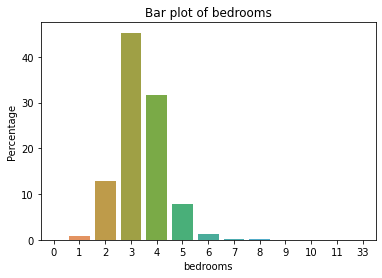

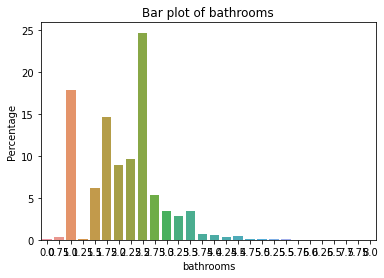

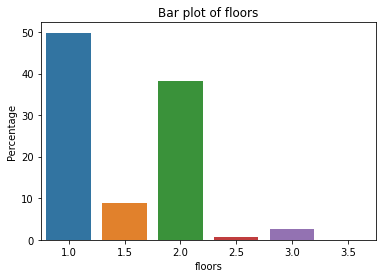

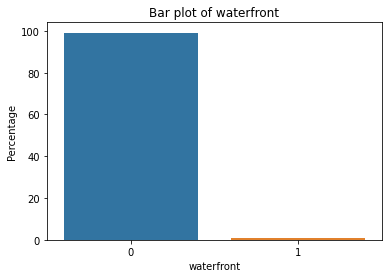

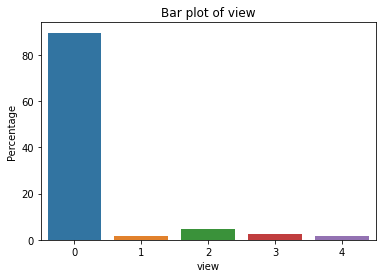

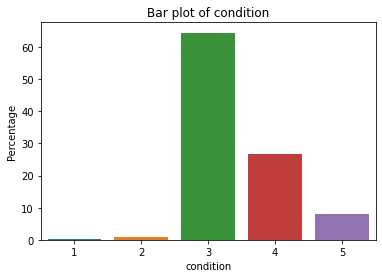

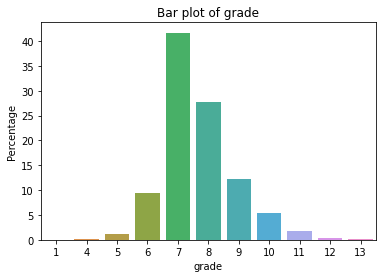

In [25]:
#lets visualise the discrete features by plotting bar plots.

for feature in discrete_features:
    df = train.copy()
    percentage = lambda i: len(i) / float(len(df)) *100
    sns.barplot(x = feature, y = feature, data = df, estimator = percentage)
    plt.xlabel(feature)
    plt.ylabel("Percentage")
    plt.title(f"Bar plot of {feature}")
    plt.show()

Conclusions from above drawn plots:<br> 
--> Approximately 50 % of houses have 3 bedrooms.<br> 
--> 25% of the houses have 2.5 bathrooms.<br> 
--> 50% of the houses have only 1 floor.<br> 
--> 99% of the houses do not have waterfront.<br> 
--> Around 85% of the houses have not been viewed even once.<br> 
--> Over 60% of the houses are of condition 3.<br> 
--> Approximately 45% of the houses are of grade 7.

In [26]:
# Checking for Anomalies in Bedroom Variable, as seen in the describe summary
max(train.bedrooms)
train[train.bedrooms == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold
7204,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,2014


In [27]:
# As we can already guess a house with 33 bedrooms and 1.75 bathroom is hard to believe. So it might have been a type error.
# Correcting the Anomaly
train.bedrooms[train.bedrooms == 33] = 3

C:\Users\yashc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


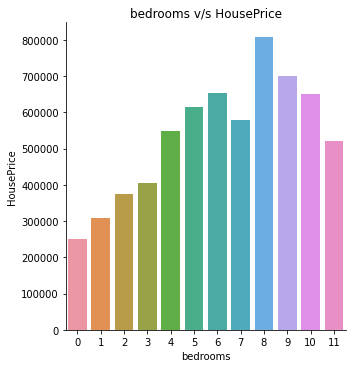

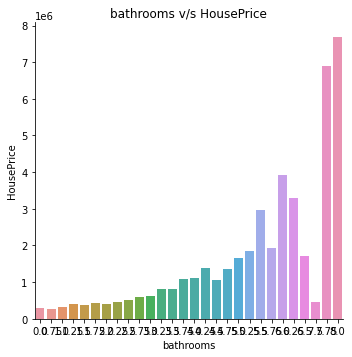

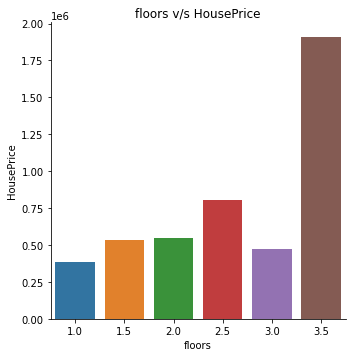

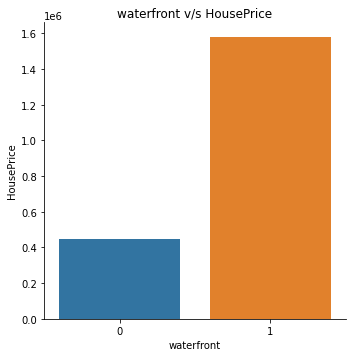

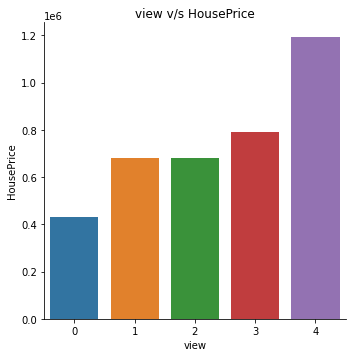

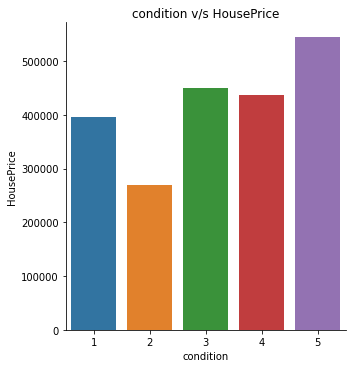

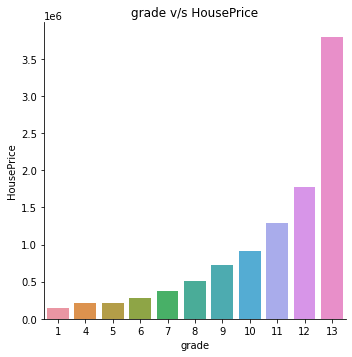

In [28]:
#lets find the relationship between discrete features and target variable

for feature in discrete_features:
    df = train.copy()
    df = df.groupby(feature)['price'].median().reset_index()
    sns.catplot(x = feature, y = 'price', data = df, kind = 'bar')
    plt.xlabel(feature)
    plt.ylabel('HousePrice')
    plt.title(f"{feature} v/s HousePrice")
    plt.show()

Conclusions made from above plots:<br>
--> Upto 6 bedrooms we can say that price of house increases as the number of bedroom increases.<br> 
--> With the increase in number of bathrooms the price of house increases till a certain point.<br> 
--> Higher the number of floors higher the price if house.<br> 
--> House with a waterfront are costlier than without waterfront.<br> 
--> House with condition 5 have higher prices.<br> 
--> Increase in grade of the house increases its price.

#### Continous Numerical Variable

In [29]:
continous_feature = [feature for feature in numerical_features if feature not in discrete_features + year_feature + ['id'] + ['date']]
print(f"Continous feature count : {len(continous_feature)}")

Continous feature count : 10


In [30]:
continous_feature

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [31]:
continous_feature.remove('lat')
continous_feature.remove('long')
continous_feature.remove('zipcode')

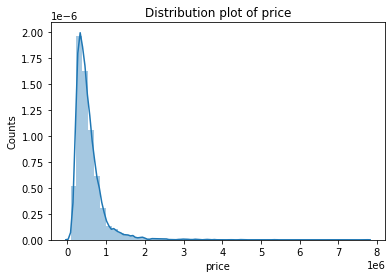

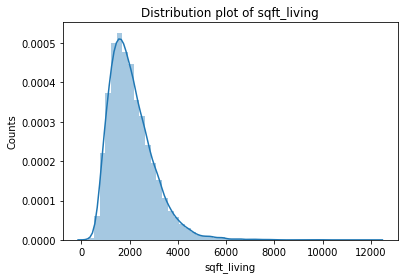

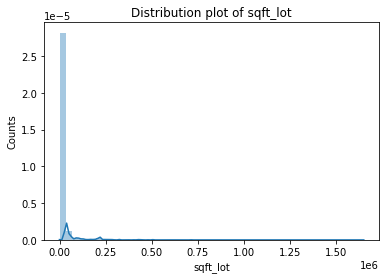

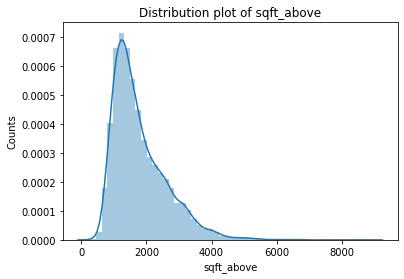

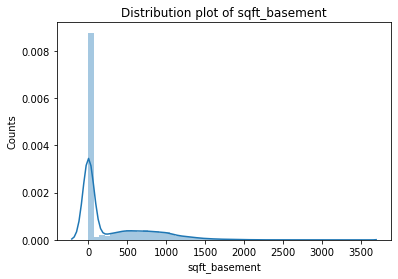

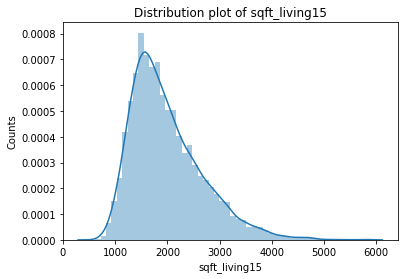

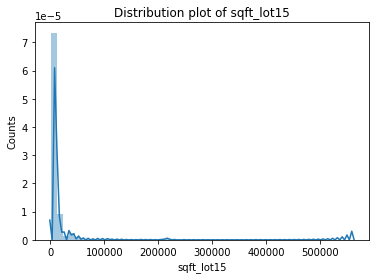

In [32]:
#let us understand continous features by plotting distribution plot

for feature in continous_feature:
    df = train.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Counts")
    plt.title(f"Distribution plot of {feature}")
    plt.show()

As we can clearly see that the distribution for all of these variables is skewed and they do not follow normal distribution.
For our regression problem it is always better to convert these non normal distribution to normal distribution to improve our linear prediction.

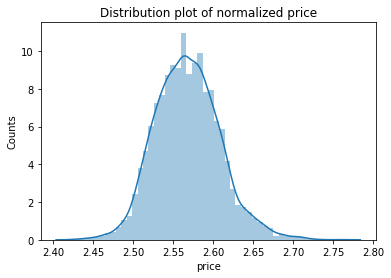

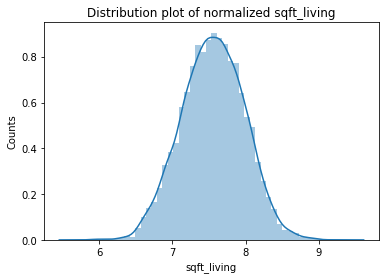

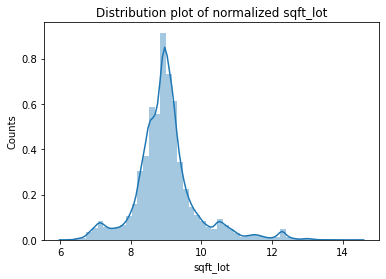

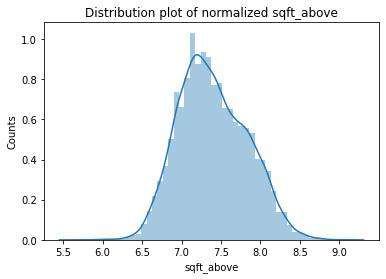

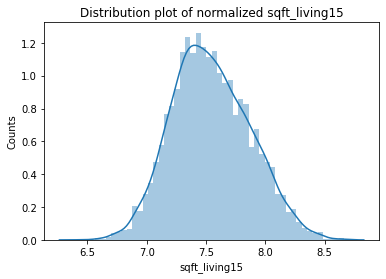

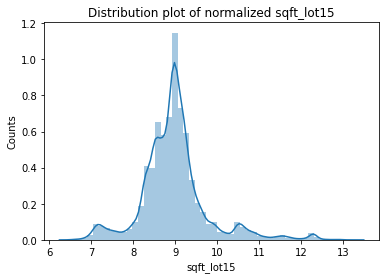

In [33]:
#using logarathmic transformation on the continous variable
#to remove the skew and tend them to a normal distribution

for feature in continous_feature:
    df = train.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df['price'] = np.log(df['price'])
        sns.distplot(df[feature])
        plt.xlabel(feature)
        plt.ylabel("Counts")
        plt.title(f"Distribution plot of normalized {feature}")
        plt.show()

Now we can see clearly all the sqft variables now are close to a normal distribution.
Log transformation is not possible on the Square Feet Basement variable, as most of the houses do not have a basement, and thus have a 0 value for the variable.

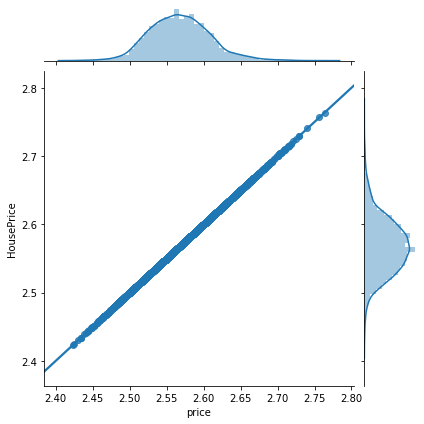

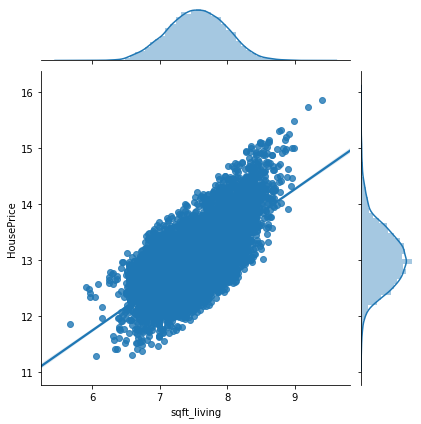

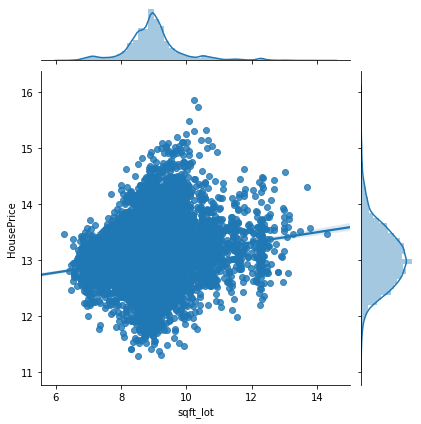

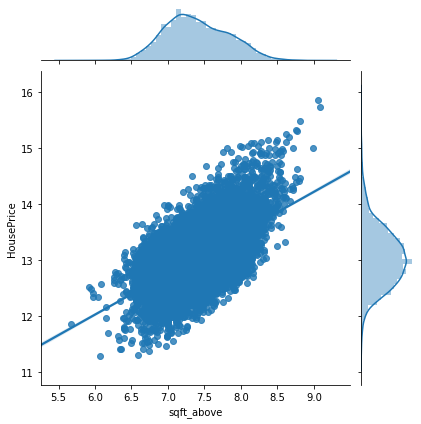

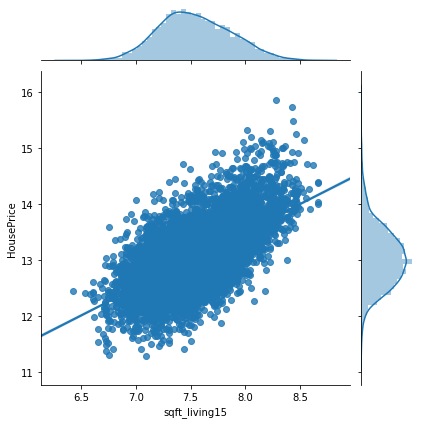

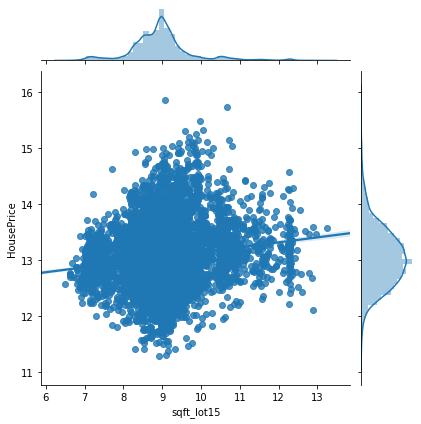

In [34]:
#Plotting a scatter plot between continous variable and target variable
#the continous varibale are normalized.

for feature in continous_feature:
    df = train.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature] = np.log(df[feature])
        df['price'] = np.log(df['price'])
        sns.jointplot(x = feature, y = 'price', data = df, kind = "reg")
        plt.xlabel(feature)
        plt.ylabel("HousePrice")
        plt.show()

Conclusions from above plot:<br>
--> There is a strong linear relationship between sqft_living and houseprice.<br>
--> Even with the normalized sqft_lot column, there’s a VERY limited linear relationship.<br>
--> There is a strong linear relationship between sqft_above and houseprice.<br>
--> the relation is same for sqft15 living with sqft living and sqft lot and sqft 15 lot.

### Location variables

In [35]:
location_variable = ['zipcode', 'lat', 'long']

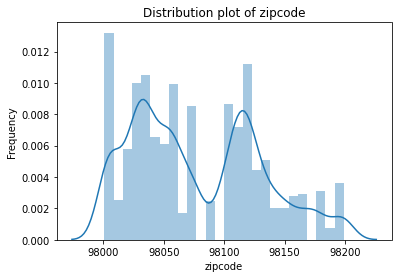

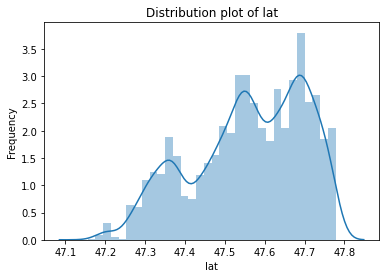

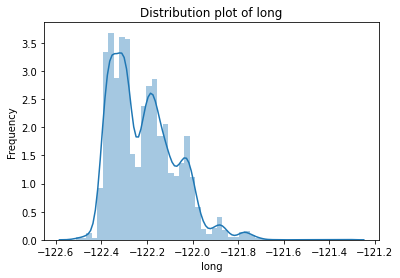

In [36]:
#let us understand location features by plotting distribution plot
for feature in location_variable:
    df = train.copy()
    sns.distplot(df[feature])
    plt.title(f"Distribution plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

Conclusions from above plot:<br>
--> Train dataset pincode are ranging from 98000 to 98200.<br>
--> Train dataset has a coverage from -122.4 to -121.2 for long variable.<br>
--> Train dataset has a coverage from 47.0 to 47.75 for lat variable.

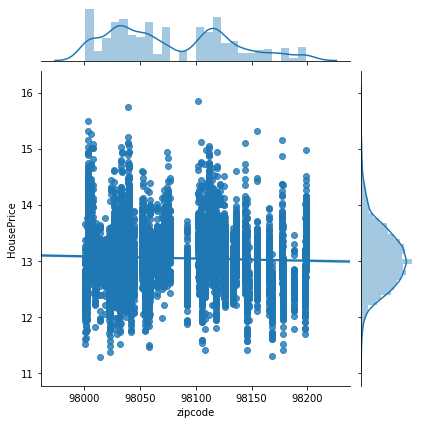

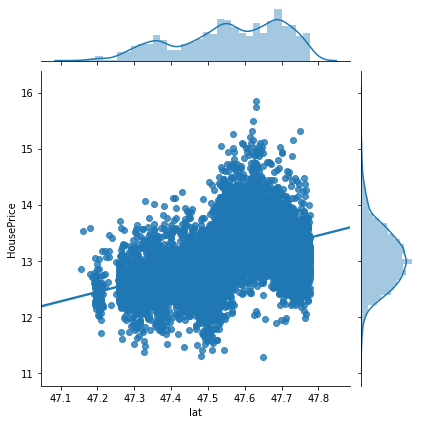

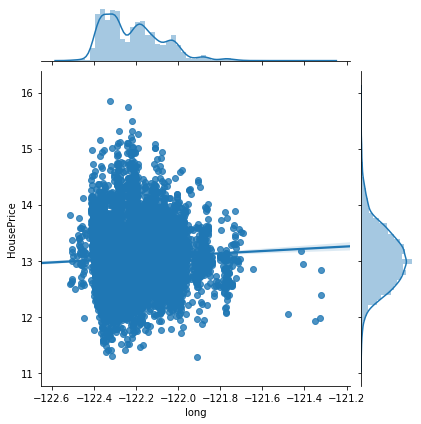

In [37]:
#let us plot location variable with respect to price.
for feature in location_variable:
    df = train.copy()
    df['price'] = np.log(df['price'])
    sns.jointplot(x = feature, y = 'price', data = df, kind = "reg")
    plt.xlabel(feature)
    plt.ylabel("HousePrice")
    plt.show()

### Outliers

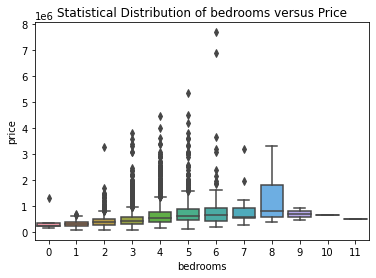

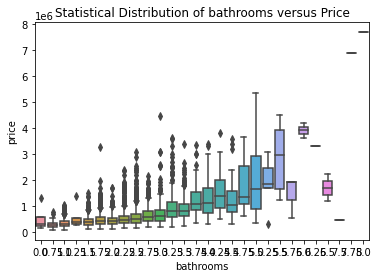

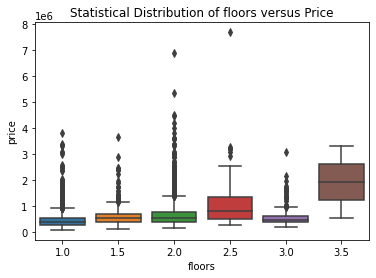

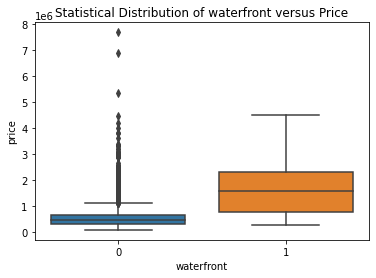

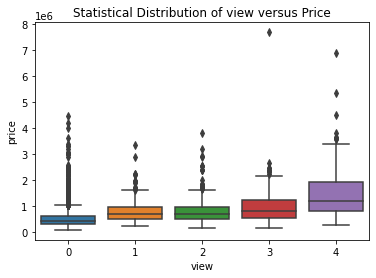

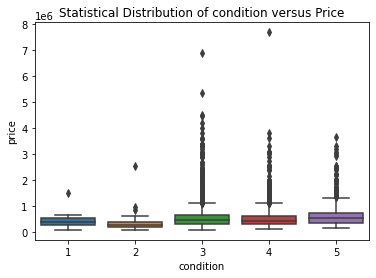

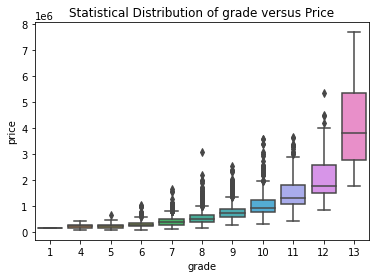

In [38]:
#Determining outliers

for feature in discrete_features:
    df = train.copy()
    sns.boxplot(x = feature, y = "price", data = df)
    plt.title(f"Statistical Distribution of {feature} versus Price")
    plt.show()

Here we have determined outliers with respect to price for discrete features.

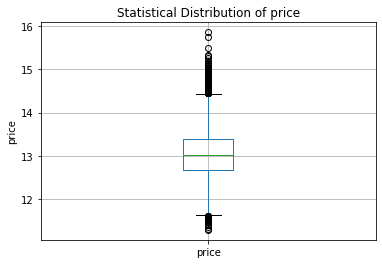

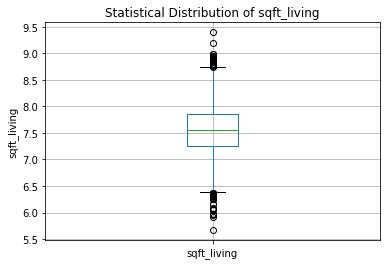

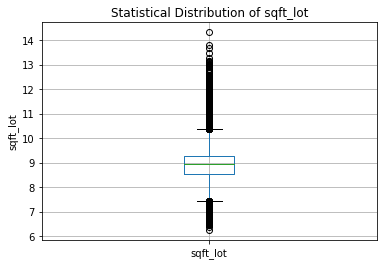

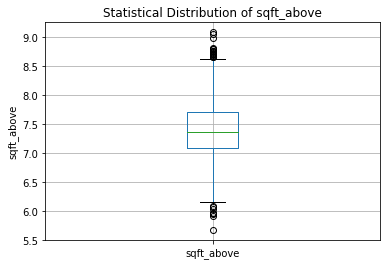

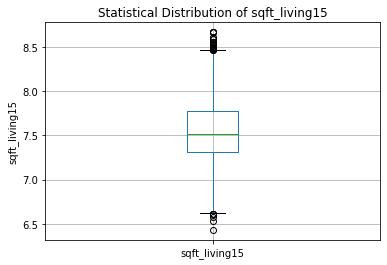

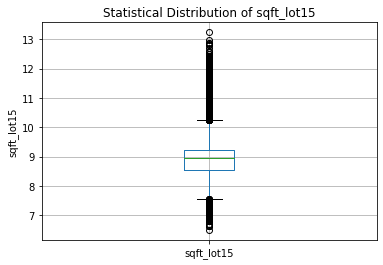

In [39]:
for feature in continous_feature:
    df=train.copy()
    if 0 in df[feature].unique():
        pass
    else:
        df[feature]=np.log(df[feature])
        df.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(f"Statistical Distribution of {feature}")
        plt.show()

We can clearly see that there are many outliers in sqft_lot and sqft_lot15.

## Bivariate Analysis

In [40]:
matrix = train.corr()
matrix = round(matrix, 2)

In [41]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise the

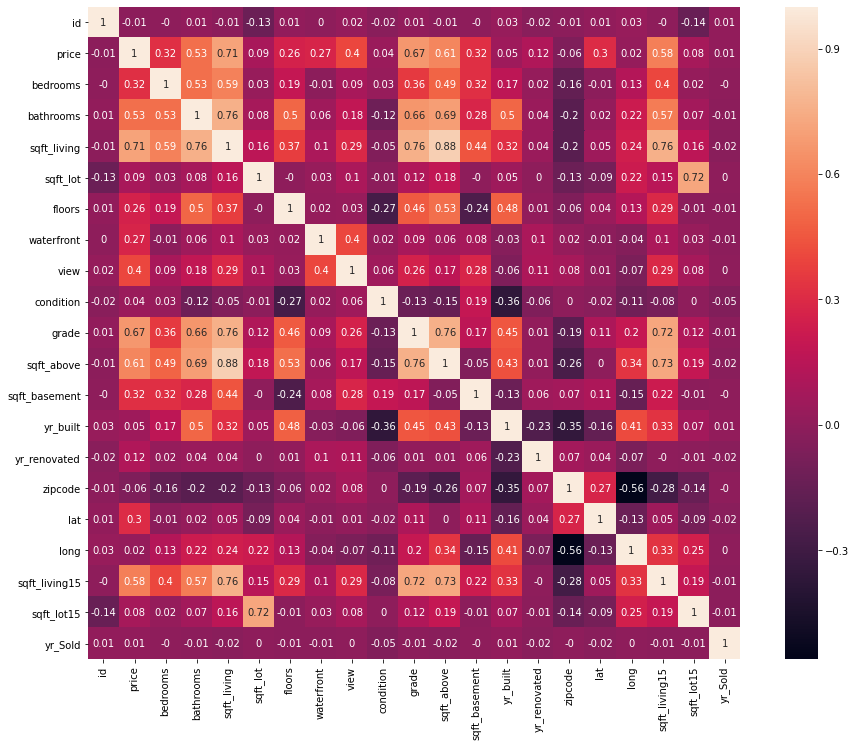

In [42]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(matrix, square = True, annot = True)

In [43]:
import ppscore as pps
import warnings

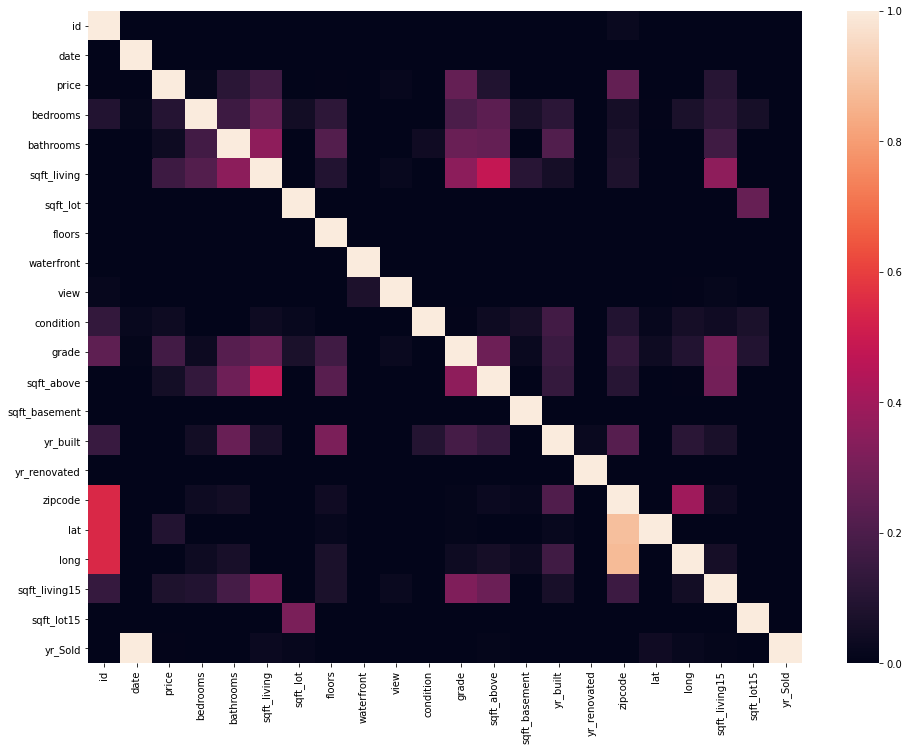

In [44]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(16,12))
sns.heatmap(pps.matrix(train))

## Feature Engineering

In [45]:
#We will modify our year renovated variable by replacing all 0 values with yr built values.
train['yr_renovated'] = np.where(train.yr_renovated == 0, 0, 1)

In [46]:
#Finding the difference in years between year built and year_sold. Age of the house
train['Age'] = train['yr_Sold'] - train['yr_built']

In [47]:
train['sqft_change'] = abs(train['sqft_living'] - train['sqft_living15'])

In [48]:
train['sqft_lot_change'] = abs(train['sqft_lot'] - train['sqft_lot15'])

In [49]:
train['basement'] = np.where(train.sqft_basement == 0, 0, 1)

In [50]:
train.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_Sold', 'Age',
       'sqft_change', 'sqft_lot_change', 'basement'],
      dtype='object')

In [51]:
train['renovation_sqft_living'] = np.where(train.sqft_change > 0, 1, 0)

In [52]:
train['renovation_sqft_lot'] = np.where(train.sqft_lot_change > 0, 1, 0)

In [53]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold,Age,sqft_change,sqft_lot_change,basement,renovation_sqft_living,renovation_sqft_lot
0,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,600,0,1,1,0
1,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,13,660,0,1,1,0
2,9212900260,2014-05-27,468000.0,2,1.00,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,72,170,0,1,1,0
3,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014,87,350,7204,0,1,1
4,6054650070,2014-10-07,400000.0,3,1.75,1370,9680,1.0,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014,37,0,528,0,0,1


In [54]:
#Since numerical continous varibales are skewed we will perform log transformation.
for feature in continous_feature:
    if 0 in train[feature].unique():
        pass
    else:
        train[feature] = np.log(train[feature])

In [55]:
#Now we will have to do the same feature engineering on validate data and test data.
#for validate data
validate['yr_renovated'] = np.where(validate.yr_renovated == 0, 0, 1)

In [56]:
#Finding the difference in years between year varibales with year_sold in validate data.
validate["Age"] = validate['yr_Sold'] - validate['yr_built']

In [57]:
validate['sqft_change'] = abs(validate['sqft_living'] - validate['sqft_living15'])

In [58]:
validate['sqft_lot_change'] = abs(validate['sqft_lot'] - validate['sqft_lot15'])

In [59]:
validate['basement'] = np.where(validate.sqft_basement == 0, 0, 1)

In [60]:
validate['renovation_sqft_living'] = np.where(validate.sqft_change > 0, 1, 0)

validate['renovation_sqft_lot'] = np.where(validate.sqft_lot_change > 0, 1, 0)

In [61]:
#Since numerical continous varibales are skewed we will perform log transformation.
for feature in continous_feature:
    if 0 in validate[feature].unique():
        pass
    else:
        validate[feature] = np.log(validate[feature])

In [62]:
validate.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold,Age,sqft_change,sqft_lot_change,basement,renovation_sqft_living,renovation_sqft_lot
0,7129300520,2014-10-13,12.309982,3,1.00,7.073270,8.639411,1.0,0,0,3,7,7.073270,0,1955,0,98178,47.5112,-122.257,7.200425,8.639411,2014,59,160,0,0,1,0
1,6414100192,2014-12-09,13.195614,3,2.25,7.851661,8.887653,2.0,0,0,3,7,7.682482,400,1951,1,98125,47.7210,-122.319,7.432484,8.941022,2014,63,880,397,1,1,1
2,5631500400,2015-02-25,12.100712,2,1.00,6.646391,9.210340,1.0,0,0,3,6,6.646391,0,1933,0,98028,47.7379,-122.233,7.908387,8.994917,2015,82,1950,1938,0,1,1
3,1954400510,2015-02-18,13.142166,3,2.00,7.426549,8.997147,1.0,0,0,3,8,7.426549,0,1987,0,98074,47.6168,-122.045,7.495542,8.923058,2015,28,120,577,0,1,1
4,1321400060,2014-06-27,12.458775,3,2.25,7.447168,8.827468,2.0,0,0,3,7,7.447168,0,1995,0,98003,47.3097,-122.327,7.713338,8.827468,2014,19,523,0,0,1,0


In [63]:
#for test data
test['yr_renovated'] = np.where(test.yr_renovated == 0, 0, 1)

In [64]:
#Finding the difference in years between year varibales with year_sold in test data.
test["Age"] = test['yr_Sold'] - test['yr_built']

In [65]:
test['sqft_change'] = abs(test['sqft_living'] - test['sqft_living15'])

In [66]:
test['sqft_lot_change'] = abs(test['sqft_lot'] - test['sqft_lot15'])

In [67]:
test['basement'] = np.where(test.sqft_basement == 0, 0, 1)

In [68]:
test['renovation_sqft_living'] = np.where(test.sqft_change > 0, 1, 0)

test['renovation_sqft_lot'] = np.where(test.sqft_lot_change > 0, 1, 0)

In [69]:
#Since numerical continous varibales are skewed we will perform log transformation.
for feature in continous_feature:
    if 0 in test[feature].unique():
        pass
    else:
        test[feature] = np.log(test[feature])

In [70]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold,Age,sqft_change,sqft_lot_change,basement,renovation_sqft_living,renovation_sqft_lot
0,3793500160,2015-03-12,12.685408,3,2.50,7.544332,8.788746,2.0,0,0,3,7,7.544332,0,2003,0,98038,47.3684,-122.031,7.779049,8.931948,2015,12,500,1010,0,1,1
1,1175000570,2015-03-12,13.180632,5,2.00,7.501082,8.486734,1.5,0,0,3,7,7.501082,0,1900,0,98107,47.6700,-122.394,7.215240,8.486734,2015,115,450,0,0,1,0
2,16000397,2014-12-05,12.149502,2,1.00,7.090077,9.195227,1.0,0,0,4,7,7.090077,0,1921,0,98002,47.3089,-122.210,6.966024,8.536015,2014,93,140,4755,0,1,1
3,461000390,2014-06-24,13.440817,4,1.75,7.753624,8.517193,1.5,0,0,4,7,7.319865,820,1929,0,98117,47.6823,-122.368,7.286192,8.517193,2014,85,870,0,1,1,0
4,7895500070,2015-02-13,12.388394,4,1.00,7.106606,8.996528,1.0,0,0,2,7,6.791221,330,1969,0,98001,47.3341,-122.282,7.162397,8.961879,2015,46,70,275,1,1,1


In [71]:
train.drop(['yr_built', 'sqft_change', 'sqft_lot_change', 'sqft_basement', 'sqft_above'], axis = 1, inplace = True)
validate.drop(['yr_built', 'sqft_change', 'sqft_lot_change', 'sqft_basement', 'sqft_above'], axis = 1, inplace = True)
test.drop(['yr_built', 'sqft_change', 'sqft_lot_change', 'sqft_basement', 'sqft_above'], axis = 1, inplace = True)

In [72]:
# train.drop(['yr_built', 'sqft_basement', 'sqft_above'], axis = 1, inplace = True)
# validate.drop(['yr_built', 'sqft_basement', 'sqft_above'], axis = 1, inplace = True)
# test.drop(['yr_built', 'sqft_basement', 'sqft_above'], axis = 1, inplace = True)

## Feature Scaling

In [73]:
feature_scale = [feature for feature in train.columns if feature not in ['id', 'price', 'date']]

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()
scaler.fit(train[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [76]:
scaler.transform(train[feature_scale])

array([[0.36363636, 0.375     , 0.51270461, ..., 1.        , 1.        ,
        0.        ],
       [0.36363636, 0.5625    , 0.78562331, ..., 1.        , 1.        ,
        0.        ],
       [0.18181818, 0.125     , 0.37196594, ..., 1.        , 1.        ,
        0.        ],
       ...,
       [0.36363636, 0.4375    , 0.66904513, ..., 1.        , 1.        ,
        1.        ],
       [0.18181818, 0.09375   , 0.33745575, ..., 0.        , 0.        ,
        1.        ],
       [0.18181818, 0.09375   , 0.33745575, ..., 0.        , 0.        ,
        1.        ]])

In [77]:
#Transform the train data and add id, date and price variables.
train = pd.concat([train[['id', 'date', 'price']].reset_index(drop = True), 
                      pd.DataFrame(scaler.transform(train[feature_scale]), columns = feature_scale)], axis = 1)

In [78]:
train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold,Age,basement,renovation_sqft_living,renovation_sqft_lot
0,2487200875,2014-12-09,13.311329,0.363636,0.37500,0.512705,0.280700,0.0,0.0,0.0,1.00,0.500000,0.0,0.681818,0.586939,0.101255,0.351594,0.300235,0.0,0.431034,1.0,1.0,0.0
1,7237550310,2014-05-12,14.018451,0.363636,0.56250,0.785623,0.654599,0.0,0.0,0.0,0.50,0.833333,0.0,0.262626,0.804568,0.425941,0.912323,0.747240,0.0,0.120690,1.0,1.0,0.0
2,9212900260,2014-05-27,13.056224,0.181818,0.12500,0.371966,0.303312,0.0,0.0,0.0,0.75,0.500000,0.0,0.575758,0.859096,0.185774,0.341610,0.327268,0.0,0.629310,1.0,1.0,0.0
3,114101516,2014-05-28,12.644328,0.272727,0.12500,0.428112,0.452012,0.2,0.0,0.0,0.75,0.500000,0.0,0.136364,0.964935,0.238494,0.472055,0.438410,0.0,0.758621,0.0,1.0,1.0
4,6054650070,2014-10-07,12.899220,0.272727,0.21875,0.416611,0.362630,0.0,0.0,0.0,0.75,0.500000,0.0,0.368687,0.734760,0.392469,0.354873,0.406059,0.0,0.327586,0.0,0.0,1.0


In [79]:
train.to_csv('train_new.csv', index = False)

In [80]:
#Now we would have to perform the same feature engineering and scaling on the train and validate data.
#for validate data
scaler.fit(validate[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [81]:
scaler.transform(validate[feature_scale])

array([[0.3       , 0.125     , 0.31710742, ..., 0.        , 1.        ,
        0.        ],
       [0.3       , 0.28125   , 0.53494701, ..., 1.        , 1.        ,
        1.        ],
       [0.2       , 0.125     , 0.19764158, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.3       , 0.3125    , 0.38980163, ..., 0.        , 0.        ,
        1.        ],
       [0.4       , 0.3125    , 0.50509774, ..., 0.        , 1.        ,
        1.        ],
       [0.3       , 0.3125    , 0.40232135, ..., 0.        , 1.        ,
        1.        ]])

In [82]:
#Transform the validate data and add id, date and price variables.
validate = pd.concat([validate[['id', 'date', 'price']].reset_index(drop = True), 
                      pd.DataFrame(scaler.transform(validate[feature_scale]), columns = feature_scale)], axis = 1)

In [83]:
validate.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold,Age,basement,renovation_sqft_living,renovation_sqft_lot
0,7129300520,2014-10-13,12.309982,0.3,0.12500,0.317107,0.300603,0.0,0.0,0.0,0.5,0.4,0.0,0.893939,0.569141,0.217608,0.413384,0.300162,0.0,0.517241,0.0,1.0,0.0
1,6414100192,2014-12-09,13.195614,0.3,0.28125,0.534947,0.333186,0.4,0.0,0.0,0.5,0.4,1.0,0.626263,0.908459,0.166113,0.503104,0.342058,0.0,0.551724,1.0,1.0,1.0
2,5631500400,2015-02-25,12.100712,0.2,0.12500,0.197642,0.375539,0.0,0.0,0.0,0.5,0.3,0.0,0.136364,0.935792,0.237542,0.687103,0.349544,1.0,0.715517,0.0,1.0,1.0
3,1954400510,2015-02-18,13.142166,0.3,0.25000,0.415976,0.347557,0.0,0.0,0.0,0.5,0.5,0.0,0.368687,0.739932,0.393688,0.527485,0.339562,1.0,0.250000,0.0,1.0,1.0
4,1321400060,2014-06-27,12.458775,0.3,0.28125,0.421746,0.325286,0.4,0.0,0.0,0.5,0.4,0.0,0.010101,0.243248,0.159468,0.611691,0.326284,0.0,0.172414,0.0,1.0,0.0


In [84]:
validate.to_csv('validate_new.csv', index = False)

In [85]:
#for test data
scaler.fit(test[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [86]:
#Transform the test data and add id, date and price variables.
test = pd.concat([test[['id', 'date', 'price']].reset_index(drop = True), 
                      pd.DataFrame(scaler.transform(test[feature_scale]), columns = feature_scale)], axis = 1)

In [87]:
test.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_Sold,Age,basement,renovation_sqft_living,renovation_sqft_lot
0,3793500160,2015-03-12,12.685408,0.250,0.363636,0.513685,0.350303,0.4,0.0,0.0,0.50,0.375,0.0,0.186869,0.298646,0.414150,0.652137,0.386784,1.0,0.112069,0.0,1.0,1.0
1,1175000570,2015-03-12,13.180632,0.500,0.272727,0.498914,0.303537,0.2,0.0,0.0,0.50,0.375,0.0,0.535354,0.815704,0.100949,0.446739,0.312083,1.0,1.000000,0.0,1.0,0.0
2,16000397,2014-12-05,12.149502,0.125,0.090909,0.358544,0.413245,0.0,0.0,0.0,0.75,0.375,0.0,0.005051,0.196640,0.259707,0.355949,0.320352,0.0,0.810345,0.0,1.0,1.0
3,461000390,2014-06-24,13.440817,0.375,0.227273,0.585164,0.308254,0.2,0.0,0.0,0.75,0.375,0.0,0.585859,0.836791,0.123382,0.472587,0.317194,0.0,0.741379,1.0,1.0,0.0
4,7895500070,2015-02-13,12.388394,0.375,0.090909,0.364189,0.382477,0.0,0.0,0.0,0.25,0.375,0.0,0.000000,0.239842,0.197584,0.427488,0.391806,1.0,0.405172,1.0,1.0,1.0


In [88]:
test.to_csv('test_new.csv', index = False)

## Model Building

### Simple Linear Regression

In [89]:
train.drop(['id', 'date', 'zipcode', 'view', 'yr_Sold'], axis = 1, inplace = True)

In [90]:
validate.drop(['id', 'date', 'zipcode', 'view', 'yr_Sold'], axis = 1, inplace = True)

In [91]:
test.drop(['id', 'date', 'zipcode', 'view', 'yr_Sold'], axis = 1, inplace = True)

In [92]:
features = list(train.columns)
features.remove('price')

In [93]:
validate.shape

(9635, 18)

In [94]:
validate = validate.round(3)

In [95]:
train = train.round(3)

In [180]:
def simple_regression(train, validate, feature):
    y_train = np.array(train['price']).reshape(9761, 1)
    y_validate = np.array(validate['price']).reshape(9635,1)
    
    x_train = [np.array(train[feature]).reshape(9761,1) for feature in features]
    x_validate = [np.array(validate[feature]).reshape(9635,1)for feature in features]
    
    model = LinearRegression()
    rmse_final = []
    r_squared = []
    for (i, j) in zip(x_train, x_validate):
        a = model.fit(i, y_train)
        y_pred = model.predict(j)
        rmse = np.sqrt(np.mean((np.array(np.exp(y_validate)) - (np.exp(y_pred)))**2))
        rmse_final.append(rmse)
        r1 = r2_score
        r = r2_score(y_validate, y_pred, multioutput = 'uniform_average')
        r_squared.append(r)
    return list([rmse_final, r_squared])

In [181]:
x = simple_regression(train, validate, features)

In [182]:
for i,j in zip(x[0], features):
    print(f"The RMSE for price and {j} is --> {i}")
    print("-------------------------------------------------------------")

The RMSE for price and bedrooms is --> 341008.67151862965
-------------------------------------------------------------
The RMSE for price and bathrooms is --> 302302.45887324656
-------------------------------------------------------------
The RMSE for price and sqft_living is --> 296456.7095665926
-------------------------------------------------------------
The RMSE for price and sqft_lot is --> 358874.47364732187
-------------------------------------------------------------
The RMSE for price and floors is --> 352041.56285764155
-------------------------------------------------------------
The RMSE for price and waterfront is --> 350380.7876446834
-------------------------------------------------------------
The RMSE for price and condition is --> 363455.0052526815
-------------------------------------------------------------
The RMSE for price and grade is --> 302542.09907119727
-------------------------------------------------------------
The RMSE for price and yr_renovated is --

In [183]:
for i,j in zip(x[1], features):
    print(f"The R-squared for price and {j} is --> {i}")
    print("--------------------------------------------------------------------")

The R-squared for price and bedrooms is --> 0.09685097765656236
--------------------------------------------------------------------
The R-squared for price and bathrooms is --> 0.30271572397899726
--------------------------------------------------------------------
The R-squared for price and sqft_living is --> 0.33627912711869845
--------------------------------------------------------------------
The R-squared for price and sqft_lot is --> 0.014826875134566597
--------------------------------------------------------------------
The R-squared for price and floors is --> 0.08998613280258094
--------------------------------------------------------------------
The R-squared for price and waterfront is --> 0.030587986961061464
--------------------------------------------------------------------
The R-squared for price and condition is --> 0.0011800750822306139
--------------------------------------------------------------------
The R-squared for price and grade is --> 0.0400181383236744


Here from r-squared score we can clearly see that the score is around 30% from some variables such as sqft_living, sqft_living15, bathrooms, sqft_above and it is quite less for other variables.<br>
RMSE is highest for condition as it says the price varies around 363469 for condition variable.
RMSE is lowest for sqft_living and sqft_living15 it is around 294000, it says price varies around 294000 for this variable.

### Multiple Linear Regression 

In [100]:
y_train = np.array(train['price']).reshape(9761, 1)
y_validate = np.array(validate['price']).reshape(9635,1)
y_test = np.array(test['price']).reshape(2217,1)

In [101]:
X_train = train.drop(['price'], axis = 1)
X_validate = validate.drop(['price'], axis = 1)
X_test = test.drop(['price'], axis = 1)

In [102]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
y_pred = model.predict(sm.add_constant(X_validate))
print(f"Summary is {model.summary()} \n")

Summary is                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     1927.
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        03:22:42   Log-Likelihood:                -495.67
No. Observations:                9761   AIC:                             1027.
Df Residuals:                    9743   BIC:                             1157.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const            

In [103]:
r = r2_score(y_validate, y_pred)
print(r)

0.5516330485033224


In [104]:
r_2 = 1 - (((1-r)*(len(y_validate) - 1))/(len(y_validate) - X_validate.shape[1] - 1))
r_2

0.5508404688864519

As we can see that r2 score of our model is 55.08 % lets see if we can improve it. We will further try using brute force method to check r squared values for all the combinations of the varibale and find the best among them.

In [107]:
columns = list(train.columns)     #created a list of all the columns in our dataset.
columns.remove('price')

In [108]:
import itertools
from itertools import combinations
#using combinations from iotertools will get a list which stores all the possible combinations between the features.

all_combin = []
for i in range(1, len(columns)+1):
    x = list(combinations(columns, i))
    all_combin.append(x)

In [109]:
#merging the list of lists of combinations to a single list.
merged = list(itertools.chain.from_iterable(all_combin))

In [144]:
#Iterating over all the possible combinations and finding the value of R-squared on the validation data.
#appending those values in a list r_Score.
model_1 = LinearRegression()
r_Score = []
adj_r_score = []
for i in merged:
    x_train = train[np.intersect1d(train.columns, i)]
    x_validate = validate[np.intersect1d(validate.columns, i)]
    model_1.fit(x_train, y_train)
    y_pred = model_1.predict(x_validate)
    r = r2_score(y_validate, y_pred)
    r_Score.append(round(r, 3))
    r_2 = 1 - (((1-r)*(len(y_validate) - 1))/(len(y_validate) - x_train.shape[1] - 1))
    adj_r_score.append(round(r_2, 3))

In [145]:
#creating a dictionary where keys are the combination of features and values their R-square.
R_score = dict(zip(merged, r_Score))   

In [146]:
#creating a dictionary where keys are the combination of features and values their R-square.
adj_R_score = dict(zip(merged, adj_r_score))  

In [147]:
#From the dictionary finding the maximum value of R-square and its key will give us the best subset of features.
best_model_r = max(R_score, key = lambda x: R_score[x])
best_model_r = list(best_model_r)
best_model_r

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Age',
 'basement',
 'renovation_sqft_lot']

In [114]:
sort_r_score = {k: v for k, v in sorted(R_score.items(), key=lambda item: item[1], reverse = True)}

In [184]:
sort_adj_r_score = {k: v for k, v in sorted(adj_R_score.items(), key=lambda item: item[1], reverse = True)}

In [148]:
#From the dictionary finding the maximum value of R-square and its key will give us the best subset of features.
best_model_r_adj = max(adj_R_score, key = lambda x: adj_R_score[x])
best_model_adj_r = list(best_model_r_adj)
best_model_adj_r

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Age',
 'renovation_sqft_lot']

As we can see the features in best_model_r and best_model_adj_r are different so we will use the features present in best_model_adj_r in our model building. R2 score and adjusted R2 score is maximum for these features
This is the best subset of all the combinations of our featurs using adj_r_score which has total of 13 features.

In [187]:
best_model_adj_r

['bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'yr_renovated',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'Age',
 'renovation_sqft_lot']

In [149]:
#getting our dataset ready
X_train_final = train[np.intersect1d(train.columns, best_model_adj_r)]
X_validate_final = validate[np.intersect1d(validate.columns, best_model_adj_r)]

In [150]:
#Fitting regression model on the selected features.
model = sm.OLS(y_train, sm.add_constant(X_train_final)).fit()
y_pred = model.predict(sm.add_constant(X_validate_final))
print(f"Summary is {model.summary()} \n")

Summary is                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1861.
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        03:48:22   Log-Likelihood:                -1594.5
No. Observations:                9761   AIC:                             3217.
Df Residuals:                    9747   BIC:                             3318.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  

In [151]:
r = r2_score(y_validate, y_pred)
print(r)

0.6982502167996687


In [153]:
r_2 = 1 - (((1-r)*(len(y_validate) - 1))/(len(y_validate) - X_validate_final.shape[1] - 1))
r_2

0.6978424892056967

There is an improvement in this model from our model which had all the variables. Accuracy improved by around 14%.

We will now determine high leverage points and outliers in our model and treat them and then apply our model and see if our accuracy improves.

In [154]:
# prediction intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from collections import OrderedDict

x_train = train[np.intersect1d(train.columns, best_model_adj_r)]
y_true = train['price']
y_pred = model.predict(sm.add_constant(x_train))
prstd, iv_l, iv_u = wls_prediction_std(model)
#prstd is the estimate of standard deviation of residual.
pred_dict = OrderedDict({
                         'y_pred': y_pred, 
                         'y_true': y_true, 
                         'lwr': iv_l, 
                         'upr': iv_u, 
                         'pred_se': prstd})

pred_dict
pd.DataFrame(pred_dict)

,y_pred,y_true,lwr,upr,pred_se
0,13.044511,13.311,12.485079,13.603944,0.285394
1,14.094029,14.018,13.534178,14.653881,0.285608
2,12.835470,13.056,12.276359,13.394580,0.285230
3,13.214368,12.644,12.655157,13.773579,0.285282
4,12.712601,12.899,12.153509,13.271694,0.285221
...,...,...,...,...,...
9756,12.844798,12.969,12.285456,13.404139,0.285348
9757,13.202274,13.322,12.643116,13.761432,0.285254
9758,13.441796,13.823,12.882620,14.000973,0.285264
9759,12.343220,12.904,11.783843,12.902598,0.285367


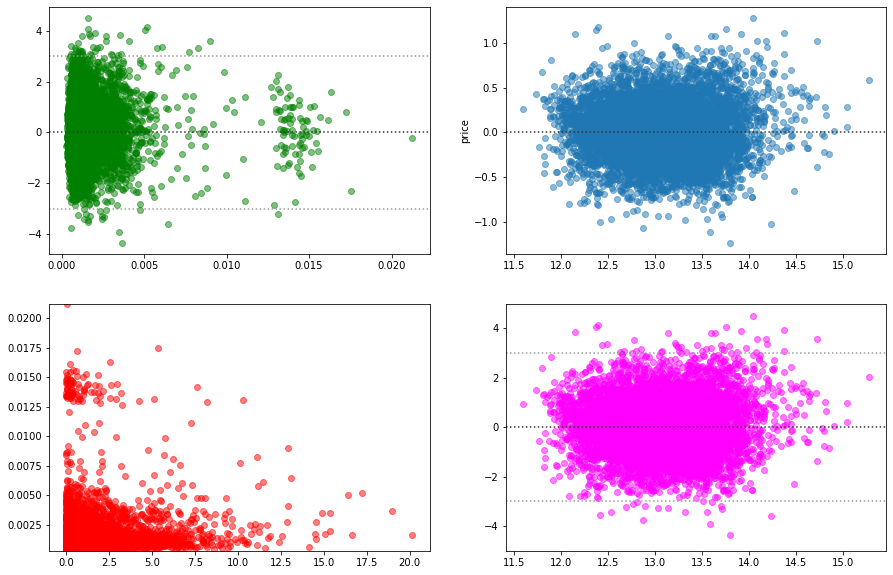

In [155]:
from statsmodels.graphics.regressionplots import *
from statsmodels.sandbox.regression.predstd import wls_prediction_std

residuals = model.resid
studentised_residuals = residuals/prstd

f, axes = plt.subplots(2, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)

#sns.regplot('sqft_living', 'price', data=train, ax=axes[0, 0], scatter_kws={'alpha': 0.5}) # regression plot
sns.residplot(y_pred, 'price', data=train, ax=axes[0, 1], scatter_kws={'alpha': 0.5}) # residual plot

#plot_leverage_resid2(model, ax=axes[1, 0], color='red') # leverage plot

# custom leverage plot instead of above
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import zscore
norm_resid = zscore(residuals)
leverage = OLSInfluence(model).hat_matrix_diag
axes[1, 0].autoscale(enable=True, axis='y', tight=True)
axes[1, 0].scatter(norm_resid ** 2, leverage, alpha=0.5, color='red')

# studentized residual plot
axes[1, 1].scatter(y_pred, studentised_residuals, alpha=0.5, color='magenta')
axes[1, 1].axhline(0, ls=":", c=".2")
axes[1, 1].axhline(-3, ls=":", c=".6")
axes[1, 1].axhline(3, ls=":", c=".6")
axes[1, 1].set_ylim(-5, 5)

axes[0, 0].scatter(leverage, studentised_residuals, alpha = 0.5, color = 'green')
axes[0, 0].axhline(0, ls=":", c=".2")
axes[0, 0].axhline(-3, ls=":", c=".6")
axes[0, 0].axhline(3, ls=":", c=".6")
x = y_pred[np.logical_or(studentised_residuals > 3, studentised_residuals < -3)]
y = studentised_residuals[np.logical_or(studentised_residuals > 3, studentised_residuals < -3)]

# for i, x, y in zip(x.index, x, y):
#     axes[1, 1].annotate(i, xy=(x, y));

In [156]:
# item with the highest leverage (0-indexed)

leverage.argmax(), leverage.max()

(1365, 0.021256024978764797)

In [157]:
outliers = list(y.index)

In [158]:
train_1 = train.copy()

In [159]:
train_1 = train.drop(train.index[[1365]])

In [160]:
y_train_1 = np.array(train_1['price']).reshape(9760, 1)

In [161]:
#getting our dataset ready
X_train_final = train_1[np.intersect1d(train.columns, best_model_adj_r)]
X_validate_final = validate[np.intersect1d(validate.columns, best_model_adj_r)]

In [162]:
#Fitting regression model on the selected features.
model = sm.OLS(y_train_1, sm.add_constant(X_train_final)).fit()
y_pred = model.predict(sm.add_constant(X_validate_final))
print(f"Summary is {model.summary()} \n")

Summary is                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     1860.
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        03:48:43   Log-Likelihood:                -1594.8
No. Observations:                9760   AIC:                             3218.
Df Residuals:                    9746   BIC:                             3318.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  

In [163]:
r = r2_score(y_validate, y_pred)
print(r)

0.6982630574812443


In [165]:
r_2 = 1 - (((1-r)*(len(y_validate) - 1))/(len(y_validate) - X_validate_final.shape[1] - 1))
r_2

0.6978553472377411

Here we tried by removing high influence point.

In [166]:
train_2 = train.copy()

In [167]:
train_2 = train.drop(train.index[outliers])

In [168]:
train_2.shape

(9702, 18)

In [169]:
y_train_2 = np.array(train_2['price']).reshape(9702, 1)

In [170]:
#getting our dataset ready
X_train_final = train_2[np.intersect1d(train.columns, best_model_adj_r)]
X_validate_final = validate[np.intersect1d(validate.columns, best_model_adj_r)]

In [171]:
#Fitting regression model on the selected features.
model = sm.OLS(y_train_2, sm.add_constant(X_train_final)).fit()
y_pred = model.predict(sm.add_constant(X_validate_final))
print(f"Summary is {model.summary()} \n")

Summary is                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     1944.
Date:                Wed, 22 Jul 2020   Prob (F-statistic):               0.00
Time:                        03:49:01   Log-Likelihood:                -1250.6
No. Observations:                9702   AIC:                             2529.
Df Residuals:                    9688   BIC:                             2630.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  

In [172]:
r = r2_score(y_validate, y_pred)
print(r)

0.6988639098742684


In [173]:
r_2 = 1 - (((1-r)*(len(y_validate) - 1))/(len(y_validate) - X_validate_final.shape[1] - 1))
r_2

0.6984570115090637

Here i tried by removing outliers in the data determined by studentised residuals. We can see that there is a very little increase in accuracy so we will apply it on our test data.

### Applying our best model on test data.

In [175]:
#Getting our test dataset ready.
X_test_final = test[np.intersect1d(test.columns, best_model_adj_r)]

In [176]:
y_final = model.predict(sm.add_constant(X_test_final))
r1 = r2_score(y_test, y_final)
print(r1)

0.6819973243486243


In [177]:
r_2 = 1 - (((1-r)*(len(y_test) - 1))/(len(y_test) - X_test_final.shape[1] - 1))
r_2

0.6970868925471534